# Water_Pumps_Data_Wrangling - EDA

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
# To have multiple outputs in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Load & merge datasets 

In [2]:
tr_l = pd.read_csv('C:/Users/USER/Desktop/Springboard/DS_Python/Capstone/waterpumps/Data/train_l.csv', index_col = False)
tr_v = pd.read_csv('C:/Users/USER/Desktop/Springboard/DS_Python/Capstone/waterpumps/Data/train_v.csv', index_col = False)
tr = pd.merge(tr_v,tr_l, how = 'left', on = 'id')

In [3]:
pd.set_option('display.max_columns', 50)
tr.head(5)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


## Drop unnecessary  variables

In [8]:
tr = tr.drop(['id','gps_height','wpt_name','num_private','subvillage','region_code','district_code','lga','ward',
       'recorded_by','scheme_name','extraction_type','extraction_type_group','management','payment','water_quality',
      'quantity_group','source','source_class','waterpoint_type_group'], axis=1)

## Clean Data

In [9]:
# funder has 3635 missing values. I will reduce the number of levels and put the missing values in others

def funder_reduce(row):  
    '''Keep top 5 records and set the rest to other'''

    if row['funder']=='Government Of Tanzania':
        return 'gov'
    elif row['funder']=='Danida':
        return 'danida'
    elif row['funder']=='Hesawa':
        return 'hesawa'
    elif row['funder']=='Rwssp':
        return 'rwssp'
    elif row['funder']=='World Bank':
        return 'world_bank'    
    else:
        return 'other'
    
tr['funder'] = tr.apply(lambda row: funder_reduce(row), axis=1)

In [10]:
# installer has 3635 missing values. I will reduce the number of levels and put the missing values in others

def installer_reduce(row):  
    '''Keep top 5 records and set the rest to other'''

    if row['installer']=='DWE':
        return 'Dwe'
    elif row['installer']=='Government':
        return 'Government'
    elif row['installer']=='RWE':
        return 'Rwe'
    elif row['installer']=='Commu':
        return 'Commu'
    elif row['installer']=='DANIDA':
        return 'Danida'    
    else:
        return 'other'
    
tr['installer'] = tr.apply(lambda row: installer_reduce(row), axis=1)

In [11]:
# public_meeting has 3334 missing values. I will put them under unkown

tr.loc[tr['public_meeting'].isnull(), 'public_meeting'] = 'Unknown'

In [12]:
# public_meeting has 3877 missing values. I will put them under unkown

tr.loc[tr['scheme_management'].isnull(), 'scheme_management'] = 'Unknown'

In [13]:
# permit has 3056 missing values. I need to put them under unkown

tr.loc[tr['permit'].isnull(), 'permit'] = 'Unknown'

# Project: Work on Your Data Story

## Mapping the status_group

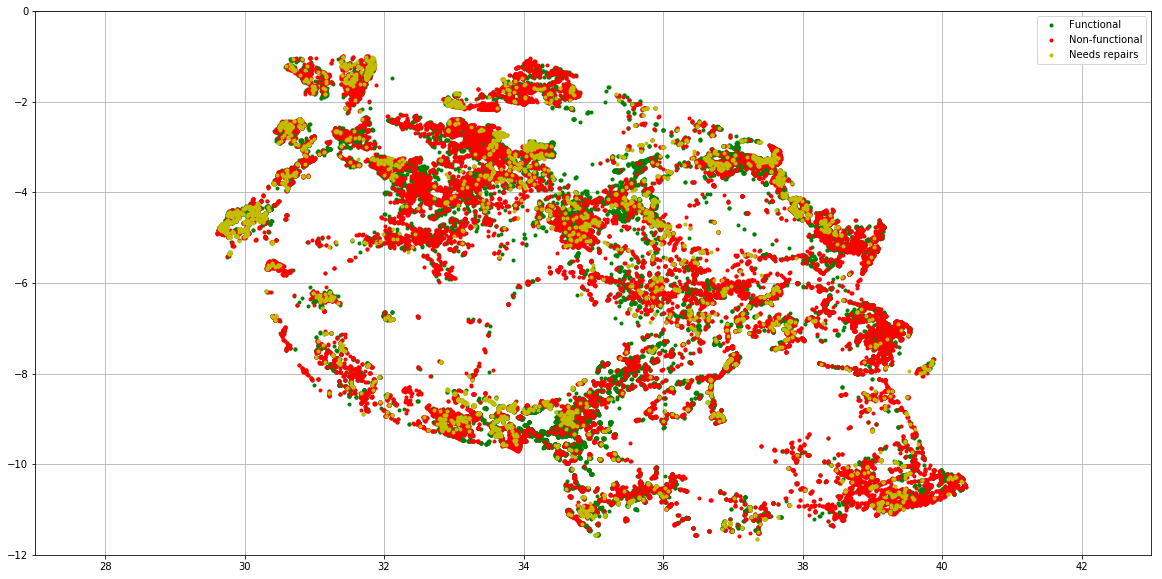

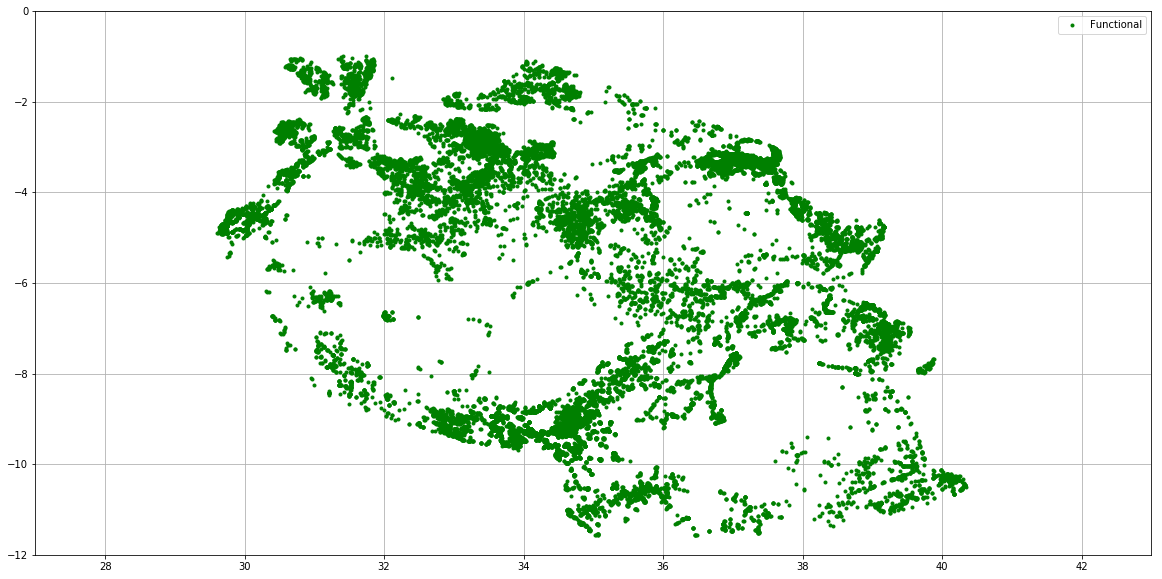

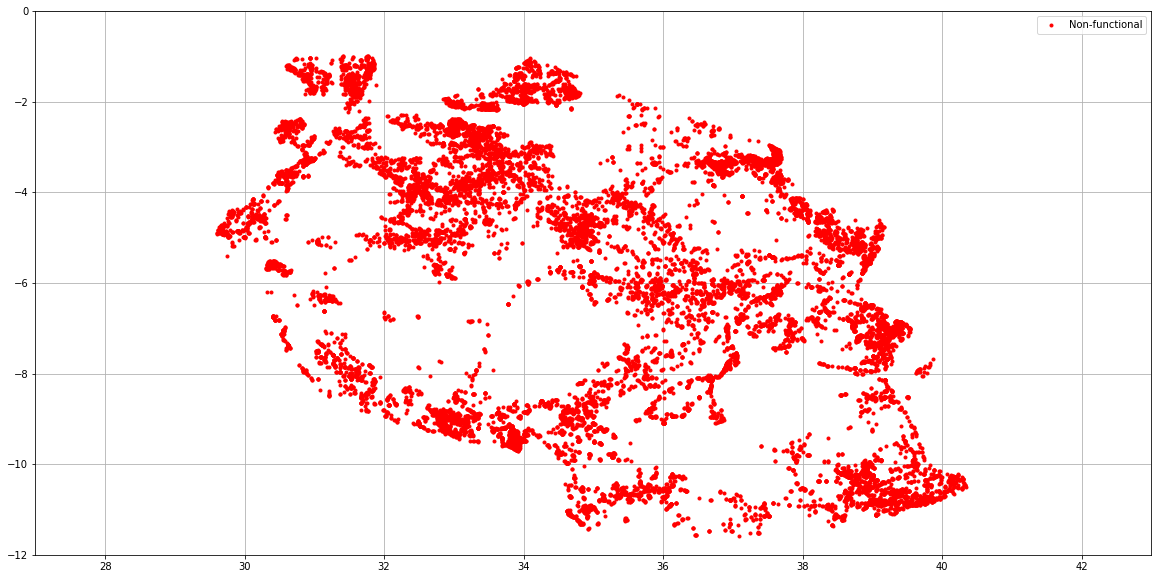

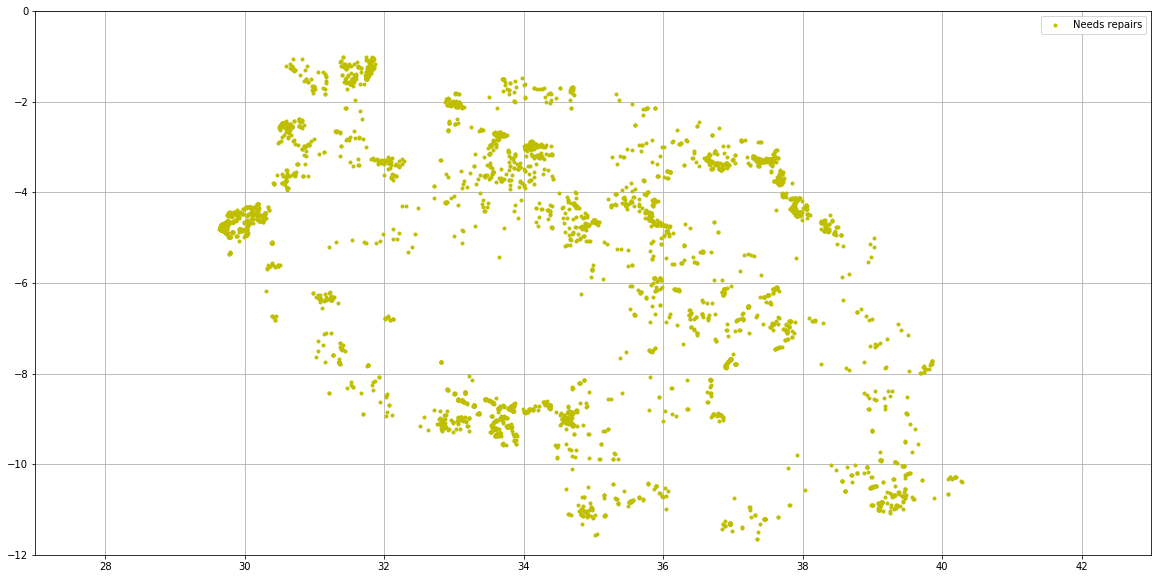

In [15]:
# separate data by status of pump
func_tr = tr[tr['status_group']=='functional']
nonfunc_tr = tr[tr['status_group']=='non functional']
repair_tr = tr[tr['status_group']=='functional needs repair']

# plot pump status on coordinate grid
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,10));
plt.plot(func_tr.longitude,func_tr.latitude,'g.');
plt.plot(nonfunc_tr.longitude,nonfunc_tr.latitude,'r.');
plt.plot(repair_tr.longitude,repair_tr.latitude,'y.');
plt.legend(['Functional','Non-functional','Needs repairs']);
plt.axis([27,43,-12,0]);
plt.grid(True);

plt.figure(figsize=(20,10));
plt.plot(func_tr.longitude,func_tr.latitude,'g.');
plt.legend(['Functional']);
plt.axis([27,43,-12,0]);
plt.grid(True);

plt.figure(figsize=(20,10));
plt.plot(nonfunc_tr.longitude,nonfunc_tr.latitude,'r.');
plt.legend(['Non-functional']);
plt.axis([27,43,-12,0]);
plt.grid(True);

plt.figure(figsize=(20,10));
plt.plot(repair_tr.longitude,repair_tr.latitude,'y.');
plt.legend(['Needs repairs']);
plt.axis([27,43,-12,0]);
plt.grid(True);

## Variables correlation

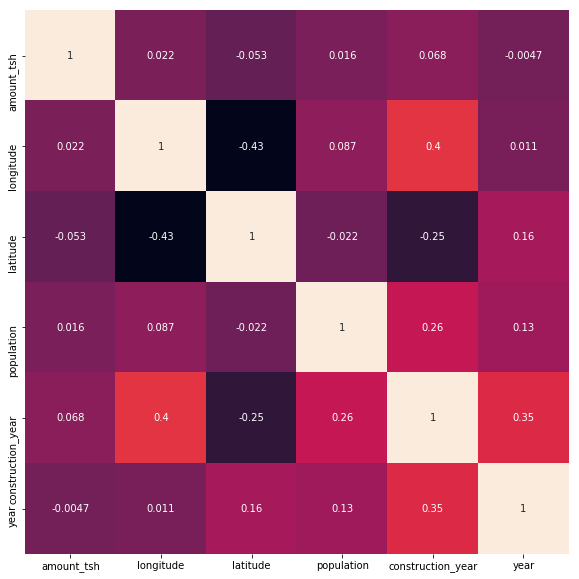

In [39]:
cor = tr.corr();
plt.figure(figsize=(20,10));
sns.heatmap(cor, square=True, annot=True, cbar=False);

## Explore the status_group using the bar chart

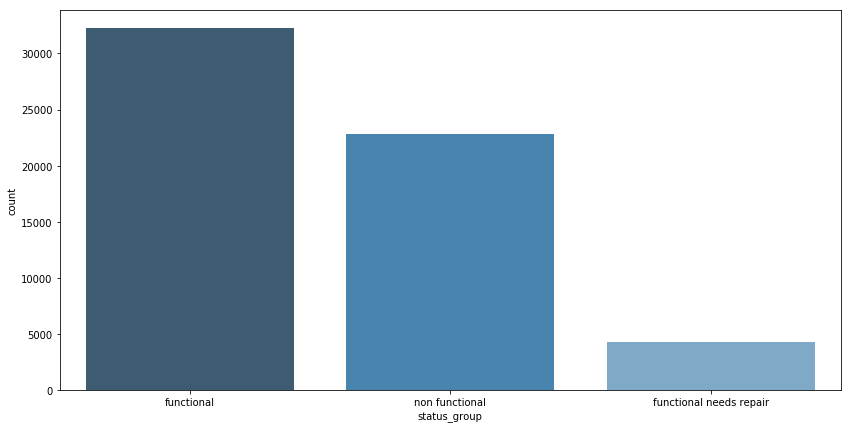

In [24]:
# to find out the count for the categories:

plt.figure(figsize=(14,7));
sns.countplot(x='status_group',data=tr, palette="Blues_d");


## When the data were recorded the most?

### 2002 and 2004 datapoints are less than 1% of the dataset combined

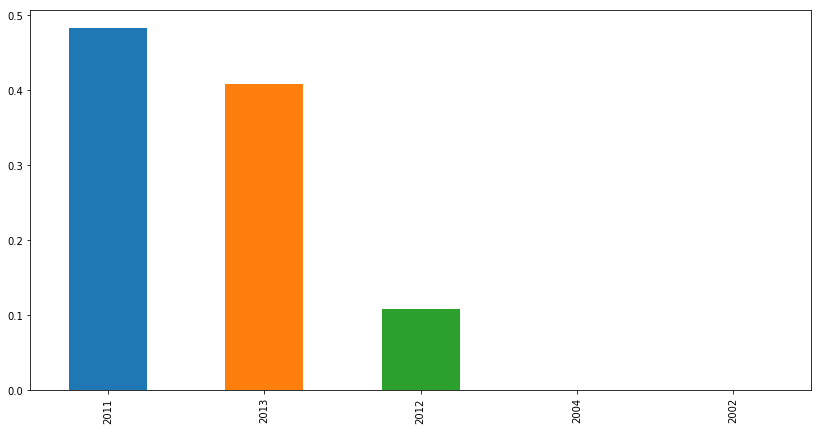

In [21]:
# TIME ANALYSIS
#not a time series as records are sporadic; there are gaps in years
tr['date_recorded']=pd.to_datetime(tr.date_recorded);
tr['year']=tr.date_recorded.dt.year;
tr.year.value_counts(normalize=True).plot(kind='bar', figsize=(14,7));


## Check the proportion of the status_group categories by the years were data were recorded

### We find that 2002 is misleading in its classification distribution (Only 1 data point in 2002).
### Most of the functional data were collected in 2011

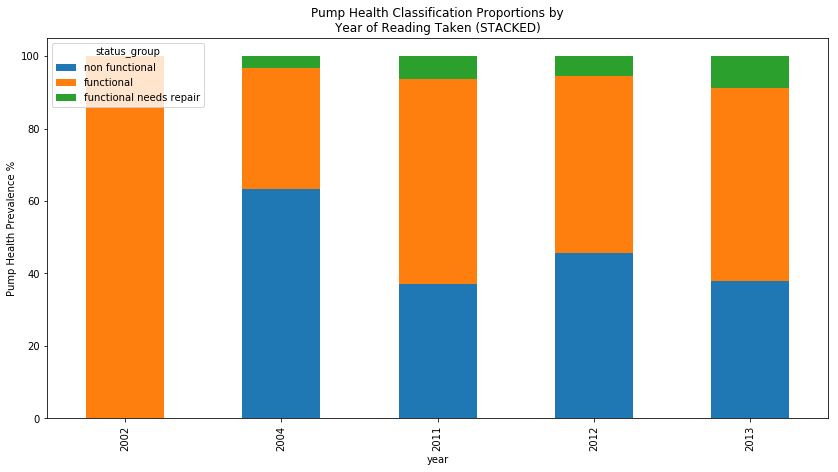

In [28]:
temp=pd.crosstab(tr.status_group, tr.year).apply(lambda col: ((col/col.sum()).round(3))*100, axis=0);
temp=temp.reindex(['non functional','functional','functional needs repair']);
temp.transpose().plot(kind='bar',legend='status_group',stacked=True,figsize=(14,7), 
                      title='Pump Health Classification Proportions by\nYear of Reading Taken (STACKED)');
plt.ylabel( 'Pump Health Prevalence %');

# this data will be changed before the modeling to represent the number of days since the most recently recorded datum we have. 
# Reason is: more recent recorded pumps might be likely be functional than non-functional or needed repair.
# this was covered in the cleaning project

## Explore the construction_year variable

### Check pumps health proportion by construction year

In [29]:
# Checking out Pump health proportion by construction years:
temp1=pd.crosstab(tr.status_group, tr.construction_year).apply(lambda col: ((col/col.sum()).round(3))*100, axis=0)
temp1=temp1.reindex(['non functional','functional','functional needs repair'])
temp1

construction_year,0,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
status_group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
non functional,40.4,70.6,76.2,73.3,56.5,80.0,36.8,64.7,45.5,66.2,69.5,72.3,39.3,65.3,65.8,59.6,57.7,66.9,64.4,49.6,72.4,60.8,59.7,61.0,57.4,...,43.4,45.0,51.2,37.2,47.5,42.7,34.1,46.5,44.4,34.9,24.3,32.3,31.9,30.2,30.1,31.1,34.0,30.8,24.6,24.8,24.5,20.1,18.7,28.3,41.5
functional,51.0,23.5,9.5,23.3,36.5,17.5,57.9,35.3,35.2,28.6,25.4,24.1,56.6,25.1,29.9,34.6,33.0,20.5,30.7,41.1,21.4,31.8,35.7,31.7,38.3,...,52.2,48.8,43.5,56.4,46.9,51.5,58.5,47.6,45.2,56.1,70.9,61.2,61.3,64.4,64.4,62.7,57.2,60.0,68.1,70.4,70.0,76.5,75.1,67.0,58.0
functional needs repair,8.6,5.9,14.3,3.3,7.1,2.5,5.3,0.0,19.3,5.2,5.1,3.6,4.1,9.6,4.3,5.8,9.4,12.6,5.0,9.4,6.2,7.4,4.6,7.3,4.3,...,4.4,6.2,5.2,6.4,5.6,5.8,7.4,5.9,10.4,9.0,4.8,6.5,6.9,5.4,5.5,6.2,8.8,9.2,7.3,4.9,5.4,3.4,6.2,4.7,0.6


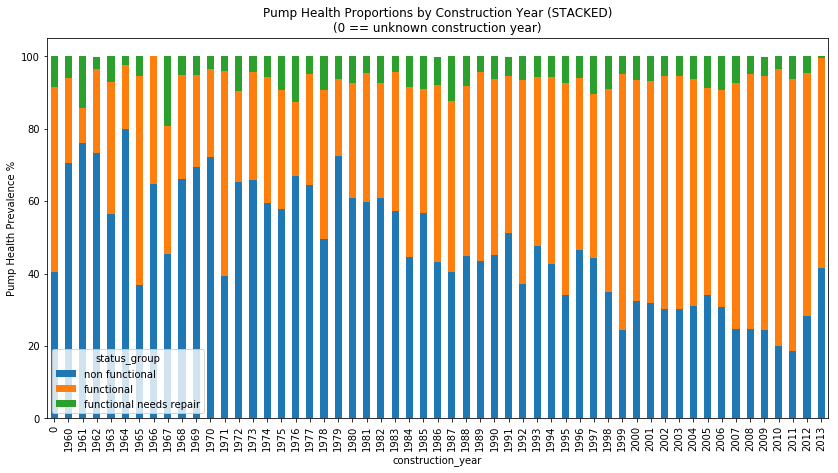

In [30]:
fig, ax = plt.subplots(1,1,figsize=(14,7));
temp1.transpose().plot(kind='bar', legend='status_group', stacked=True, ax=ax);
ax.set_ylabel('Pump Health Prevalence %');
ax.set_title('Pump Health Proportions by Construction Year (STACKED)\n(0 == unknown construction year)');

### What % of "construction years" are missing?

In [34]:
round((len(tr[tr.construction_year==0])/float(len(tr)))*100, 1)

34.9

### How is the distribution of the construction_year and how is it compared with the status_group?

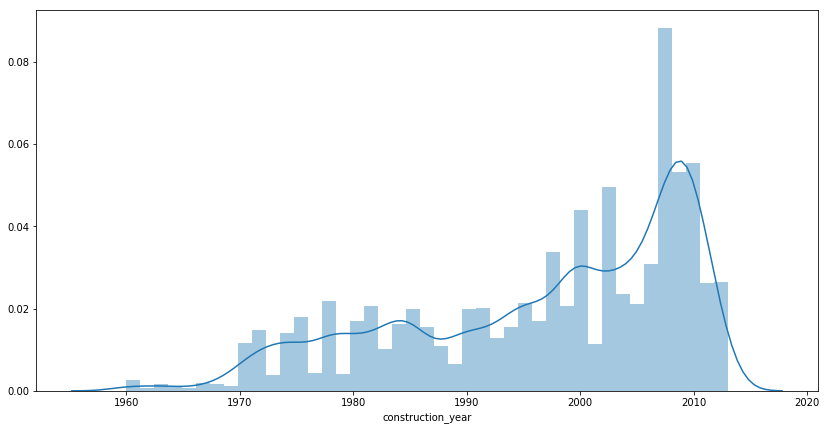

In [40]:
import warnings; warnings.simplefilter('ignore');
plt.figure(figsize=(14,7));
sns.distplot(tr['construction_year'][tr['construction_year']>0]);

# construction_year was transformed into a categorical column in the cleaning project; containing the following values: 
# '60s', '70s','80s', '90s, '00s', '10s', 'unknown'.


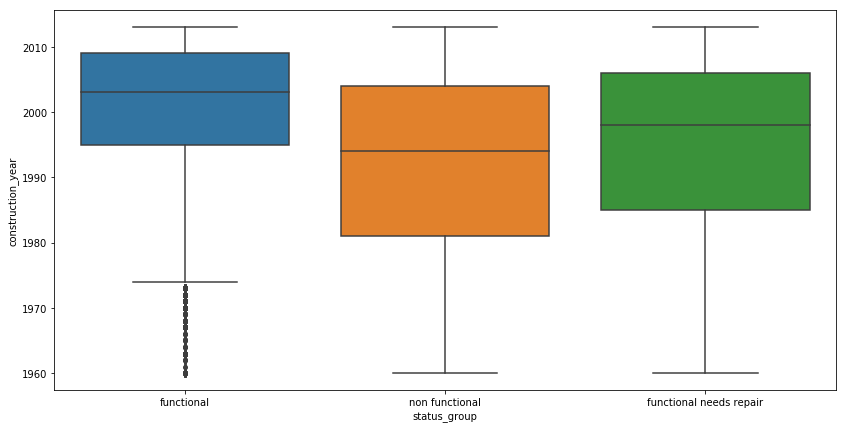

In [37]:
plt.figure(figsize=(14,7));
sns.boxplot(x='status_group', y="construction_year", data=tr[tr['construction_year']>0]);

## Represent some variables in a tree-like structure using treemaps 

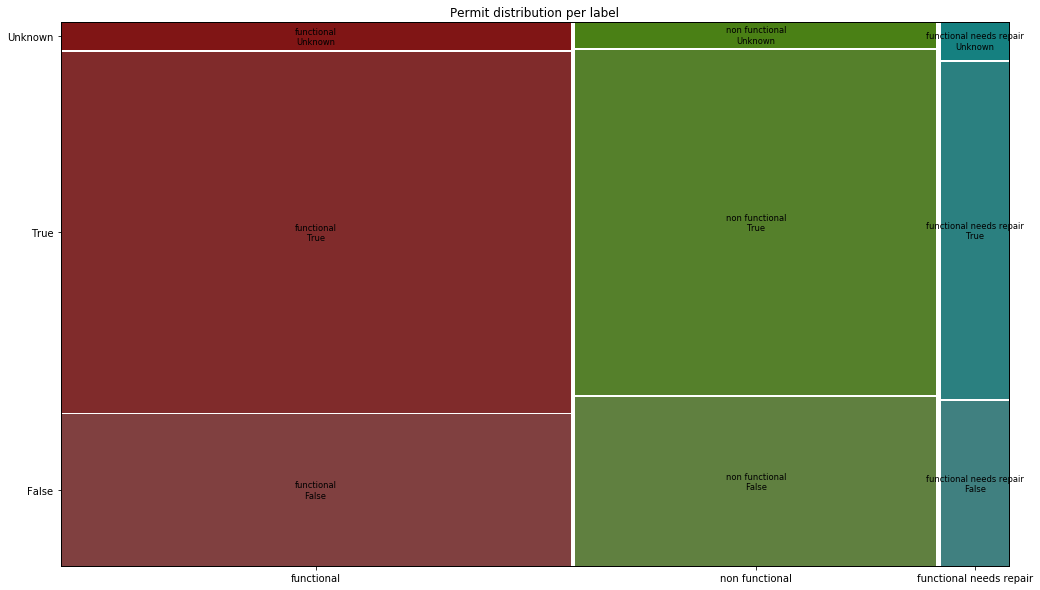

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(17, 10));
fig = mosaic(tr, ['status_group', 'permit'], axes, title="Permit distribution per label");

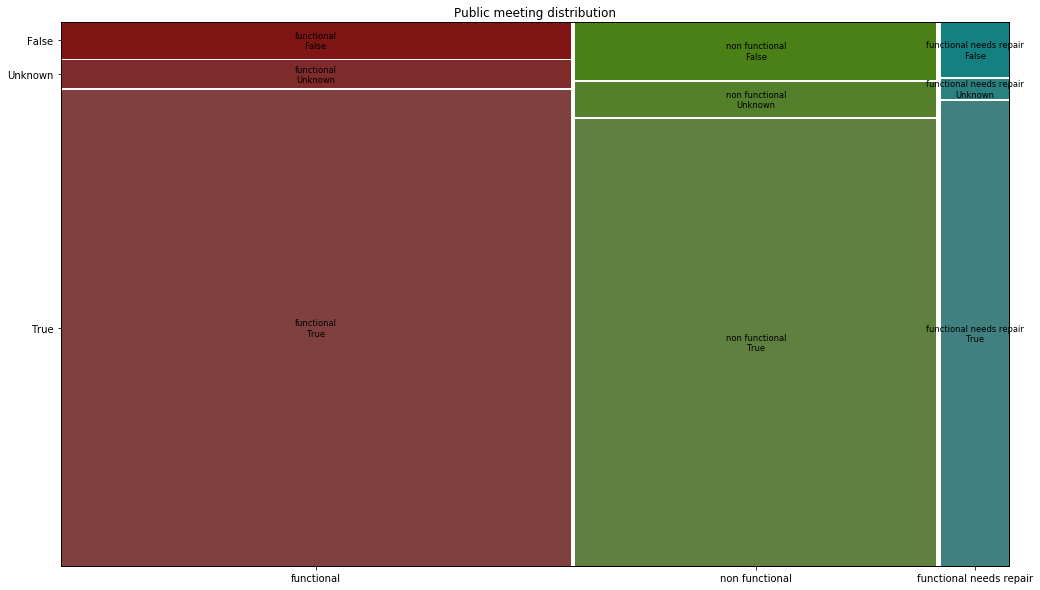

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(17, 10))
fig = mosaic(tr, ['status_group', 'public_meeting'], axes, title="Public meeting distribution")

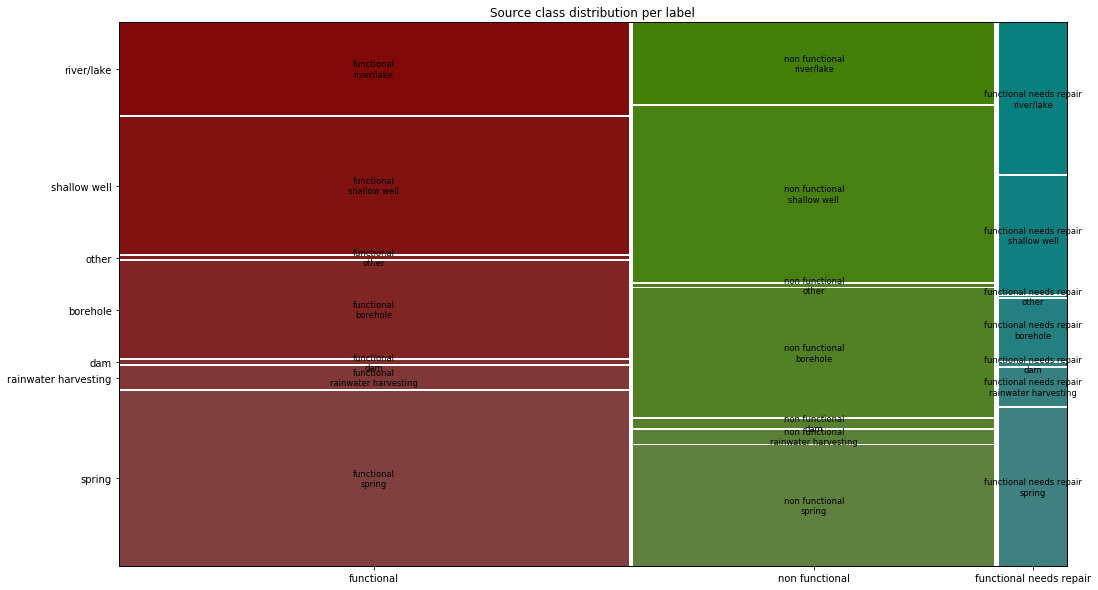

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(17, 10))
fig = mosaic(tr, ['status_group', 'source_type'], axes, title="Source class distribution per label")

## Exploring some important variables

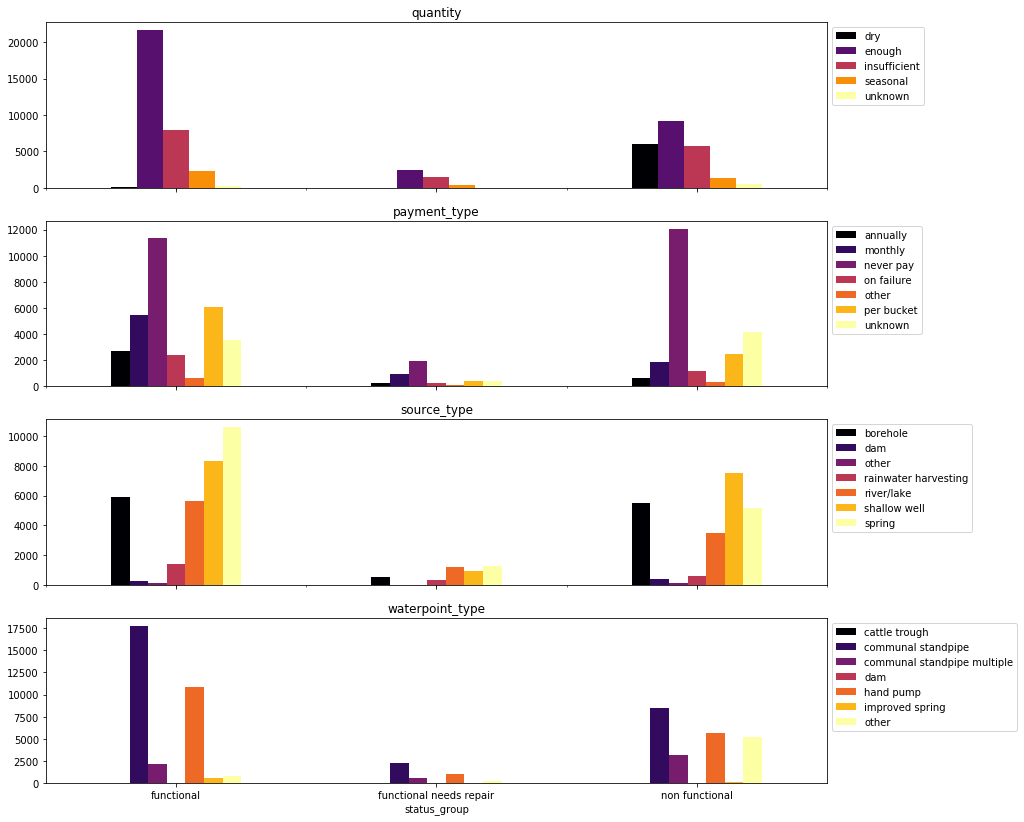

In [55]:
variables = ['quantity','payment_type','source_type','waterpoint_type']
label = 'status_group'

def plot_tables(tr,label,variables):
    fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize = (14,14))
    for i,variable in enumerate(variables):
        ax = pd.pivot_table(tr[[label,variable]], index = [label,variable], aggfunc = len)\
        .unstack(variable).plot(kind='bar', ax=axes[i], sharex=True, title=variable, rot=0, colormap='inferno')
        ax.legend(bbox_to_anchor=(1,1),loc="upper left")
plot_tables(tr,label,variables)

#quantity: the health of the pumps are better whenever there are enogh water. 
#It's interesting to note that the best second is when the quantity is insufficient!

#payment_type: It's a surprise to note that whenever the cost of the water is never paid, the pumps are mostly functional

#source_type: It's mostly functional when the source of the water is coming from the spring

#waterpoint_type: The most functional is the communal standpipe


## Top 5 regions ranked by total number of functional status group

In [101]:


fun = tr.loc[tr['status_group']=='functional'].groupby('region')
fun2 = fun['status_group'].value_counts().sort_values(ascending = False).head()
fun2

region       status_group
Iringa       functional      4141
Shinyanga    functional      2789
Kilimanjaro  functional      2640
Mbeya        functional      2319
Arusha       functional      2294
Name: status_group, dtype: int64

## Top 5 regions ranked by total number of non functional status group


In [56]:

non_fun = tr.loc[tr['status_group']=='non functional'].groupby('region')
non_fun2=non_fun['status_group'].value_counts().sort_values(ascending = False).head()
non_fun2

region       status_group  
Mbeya        non functional    1816
Morogoro     non functional    1587
Shinyanga    non functional    1558
Kilimanjaro  non functional    1417
Mwanza       non functional    1417
Name: status_group, dtype: int64

## Top 5 regions ranked by total number of need repair status group


In [61]:
rep = tr.loc[tr['status_group']=='functional needs repair'].groupby('region')
rep2= rep['status_group'].value_counts().sort_values(ascending = False).head()
rep2

region       status_group           
Shinyanga    functional needs repair    635
Kigoma       functional needs repair    603
Mbeya        functional needs repair    504
Kilimanjaro  functional needs repair    322
Kagera       functional needs repair    304
Name: status_group, dtype: int64

## Save the dataset

In [62]:
tr.to_csv('train_viz.csv', index=False)